In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/ThesisBacterialBlightDataset"

In [ ]:
!nvidia-smi

Sun Jun 22 09:34:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   71C    P0             32W /   70W |    4216MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!unzip -q /content/drive/MyDrive/ThesisBacterialBlightDataset/100inEachClass_DatasetLalap.zip

replace 100inEachClass_DatasetLalap/LalapFarm_DatasetOrigAugmented/train/baging_healthy/5113 (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: nA
replace 100inEachClass_DatasetLalap/LalapFarm_DatasetOrigAugmented/train/baging_healthy/5113 (2).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


# ***Data Preprocessing***

# **Training Image Preprocessing**

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/100inEachClass_DatasetLalap/LalapFarm_DatasetOrigAugmented/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=2,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 800 files belonging to 8 classes.


# **Validation Image Preprocessing**

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/100inEachClass_DatasetLalap/LalapFarm_DatasetOrigAugmented/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=2,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 800 files belonging to 8 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[ 41.    41.    39.  ]
   [ 41.    41.    39.  ]
   [ 41.    41.    39.  ]
   ...
   [ 43.5   43.5   43.5 ]
   [ 41.25  41.25  41.25]
   [ 41.5   41.5   41.5 ]]

  [[ 41.    41.    39.  ]
   [ 41.    41.    39.  ]
   [ 41.    41.    39.  ]
   ...
   [ 52.25  52.25  38.25]
   [ 48.    48.    34.  ]
   [ 42.5   42.5   28.5 ]]

  [[ 41.    41.    39.  ]
   [ 41.    41.    39.  ]
   [ 41.    41.    39.  ]
   ...
   [183.75 182.25 154.  ]
   [170.75 169.75 141.5 ]
   [151.25 150.25 122.  ]]

  ...

  [[ 33.    47.    33.  ]
   [ 33.75  46.25  33.  ]
   [ 36.5   44.5   35.  ]
   ...
   [ 39.5   39.75  38.  ]
   [ 37.5   37.5   37.  ]
   [ 39.5   39.5   39.5 ]]

  [[ 36.5   43.    41.  ]
   [ 38.75  42.5   39.5 ]
   [ 41.5   41.    39.  ]
   ...
   [ 40.25  40.25  42.25]
   [ 38.    38.    40.  ]
   [ 41.75  41.75  43.75]]

  [[ 43.    38.5   49.  ]
   [ 44.5   37.75  48.5 ]
   [ 47.    36.75  47.  ]
   ...
   [ 36.5   37.5   41.5 ]
   [ 35.25  35.25  37.25]
   [ 40.25  40.25  4

# ***Building Model***

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())
model.add(Dense(1500, activation='relu'))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
model.add(Dense(8, activation='softmax'))

# ***Compiling Model***

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 13, 13, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │        12,008 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,797,732 (29.75 MB)

 Trainable params: 7,797,732 (29.75 MB)

 Non-trainable params: 0 (0.00 B)

# ***Model Training***

In [ ]:
training_history = model.fit(training_set, epochs=30, validation_data=validation_set)

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.1292 - loss: 2.2968 - val_accuracy: 0.1975 - val_loss: 1.9749
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.1934 - loss: 1.9573 - val_accuracy: 0.1887 - val_loss: 2.0043
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.2932 - loss: 1.7154 - val_accuracy: 0.3487 - val_loss: 1.5966
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.4344 - loss: 1.3987 - val_accuracy: 0.5475 - val_loss: 1.2316
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.6076 - loss: 0.9889 - val_accuracy: 0.5888 - val_loss: 1.2234
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.7219 - loss: 0.7463 - val_accuracy: 0.6687 - val_loss: 0.9648
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8328 - loss: 0.4720 - val_accuracy: 0.6988 - val_loss: 0.9295
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9075 - loss: 0.3243 - val

# ***Model Evaluation***

In [ ]:
train_loss, train_acc = model.evaluate(training_set)

400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9978 - loss: 0.0175


In [ ]:
print(train_loss, train_acc)

0.010795299895107746 0.9987499713897705


In [ ]:
validation_loss, validation_acc = model.evaluate(validation_set)

400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7343 - loss: 2.3213


In [ ]:
print(validation_loss, validation_acc)

2.3449840545654297 0.7574999928474426


# ***Saving Model***

In [ ]:
model.save('/content/drive/MyDrive/ThesisBacterialBlightDataset/trained_model.keras')

In [ ]:
training_history.history

{'accuracy': [0.1587499976158142,
  0.20624999701976776,
  0.3700000047683716,
  0.5112500190734863,
  0.6600000262260437,
  0.7674999833106995,
  0.8374999761581421,
  0.9012500047683716,
  0.9362499713897705,
  0.9312499761581421,
  0.9524999856948853,
  0.9587500095367432,
  0.9649999737739563,
  0.9912499785423279,
  0.9574999809265137,
  0.9674999713897705,
  0.9762499928474426,
  0.9850000143051147,
  0.9850000143051147,
  0.9762499928474426,
  0.9700000286102295,
  0.9887499809265137,
  0.9937499761581421,
  0.9950000047683716,
  0.9837499856948853,
  0.9549999833106995,
  0.987500011920929,
  0.9787499904632568,
  0.9850000143051147,
  0.9837499856948853],
 'loss': [2.1214473247528076,
  1.899237036705017,
  1.6051781177520752,
  1.1927684545516968,
  0.9031758904457092,
  0.6550741791725159,
  0.44893360137939453,
  0.3073824346065521,
  0.18126842379570007,
  0.2240823358297348,
  0.150951087474823,
  0.1583280712366104,
  0.11042733490467072,
  0.06887046992778778,
  0.14834

In [ ]:
import json
with open('/content/drive/MyDrive/ThesisBacterialBlightDataset/training_history.json',"w") as f:
      json.dump(training_history.history,f)

In [ ]:
training_history.history['accuracy']

[0.1587499976158142,
 0.20624999701976776,
 0.3700000047683716,
 0.5112500190734863,
 0.6600000262260437,
 0.7674999833106995,
 0.8374999761581421,
 0.9012500047683716,
 0.9362499713897705,
 0.9312499761581421,
 0.9524999856948853,
 0.9587500095367432,
 0.9649999737739563,
 0.9912499785423279,
 0.9574999809265137,
 0.9674999713897705,
 0.9762499928474426,
 0.9850000143051147,
 0.9850000143051147,
 0.9762499928474426,
 0.9700000286102295,
 0.9887499809265137,
 0.9937499761581421,
 0.9950000047683716,
 0.9837499856948853,
 0.9549999833106995,
 0.987500011920929,
 0.9787499904632568,
 0.9850000143051147,
 0.9837499856948853]

# ***Accuracy Visualization***

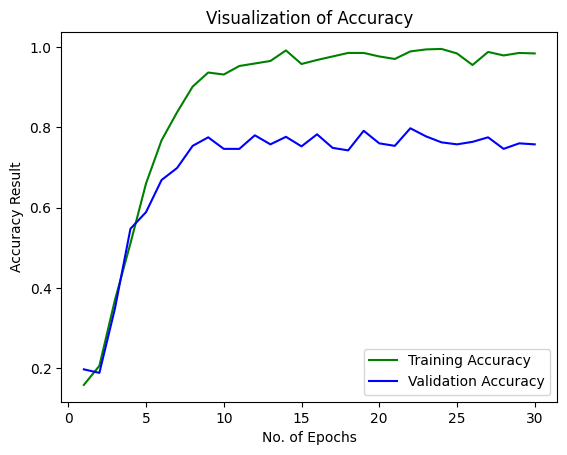

In [ ]:
epochs = [i for i in range(1, 31)]
plt.plot (epochs, training_history.history['accuracy'], 'g', label='Training Accuracy')
plt.plot (epochs, training_history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Visualization of Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.legend()

In [ ]:
class_names = training_set.class_names
class_names

['baging_healthy',
 'baging_mild',
 'baging_moderate',
 'baging_severe',
 'cassava_healthy',
 'cassava_mild',
 'cassava_moderate',
 'cassava_severe']

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/100inEachClass_DatasetLalap/LalapFarm_DatasetOrigAugmented/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 800 files belonging to 8 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


(array([[1.00000000e+00, 6.32678317e-14, 4.10986356e-10, ...,
         2.72513290e-16, 3.84436068e-15, 2.50090522e-15],
        [1.00000000e+00, 1.40834982e-15, 1.01564205e-17, ...,
         7.64397310e-28, 1.10054119e-23, 6.71271153e-23],
        [1.00000000e+00, 1.48178345e-10, 3.30877570e-09, ...,
         9.08240836e-14, 5.14381723e-13, 8.04517531e-13],
        ...,
        [1.14345181e-15, 2.69955933e-12, 1.13320499e-13, ...,
         9.78883248e-14, 6.71155760e-07, 9.99999285e-01],
        [3.22337409e-16, 1.78784396e-12, 1.53336697e-14, ...,
         5.95308054e-15, 2.79463652e-08, 1.00000000e+00],
        [4.25844722e-17, 2.96153503e-16, 6.62487990e-12, ...,
         7.80742984e-16, 1.35261973e-12, 9.99999642e-01]], dtype=float32),
 (800, 8))

In [ ]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(800,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 6, 6, 5, 1, 5,
       1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 0, 0, 0, 0, 1, 5, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 0, 1, 1, 1, 6, 6, 6, 1, 1, 1, 3, 2, 2, 0, 2, 2, 2, 2, 7,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2,
     

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(800, 8), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(800,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

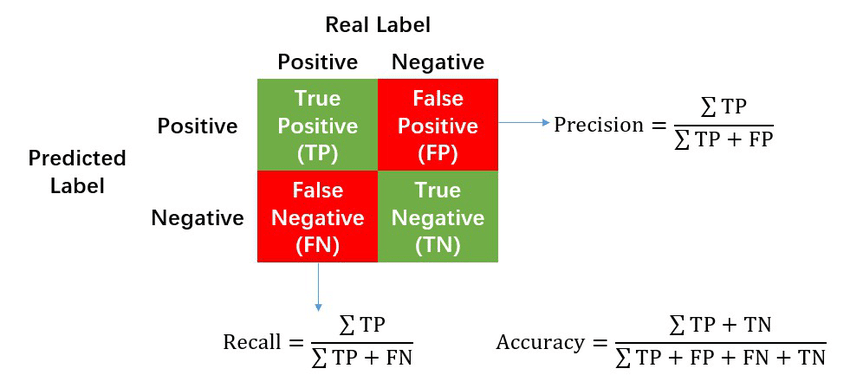

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(Y_true, predicted_categories, target_names=class_names))

                  precision    recall  f1-score   support

  baging_healthy       0.61      1.00      0.76       100
     baging_mild       0.59      0.46      0.52       100
 baging_moderate       0.76      0.41      0.53       100
   baging_severe       0.93      0.90      0.91       100
 cassava_healthy       0.92      0.87      0.89       100
    cassava_mild       0.71      0.67      0.69       100
cassava_moderate       0.76      0.75      0.75       100
  cassava_severe       0.84      1.00      0.91       100

        accuracy                           0.76       800
       macro avg       0.76      0.76      0.75       800
    weighted avg       0.76      0.76      0.75       800



In [ ]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[100,   0,   0,   0,   0,   0,   0,   0],
       [ 32,  46,  12,   3,   0,   5,   2,   0],
       [ 27,  27,  41,   1,   0,   0,   3,   1],
       [  1,   0,   1,  90,   0,   0,   0,   8],
       [  3,   0,   0,   0,  87,   8,   2,   0],
       [  0,   5,   0,   3,   8,  67,  17,   0],
       [  0,   0,   0,   0,   0,  15,  75,  10],
       [  0,   0,   0,   0,   0,   0,   0, 100]])

# ***Confusion Matrix Visualization***

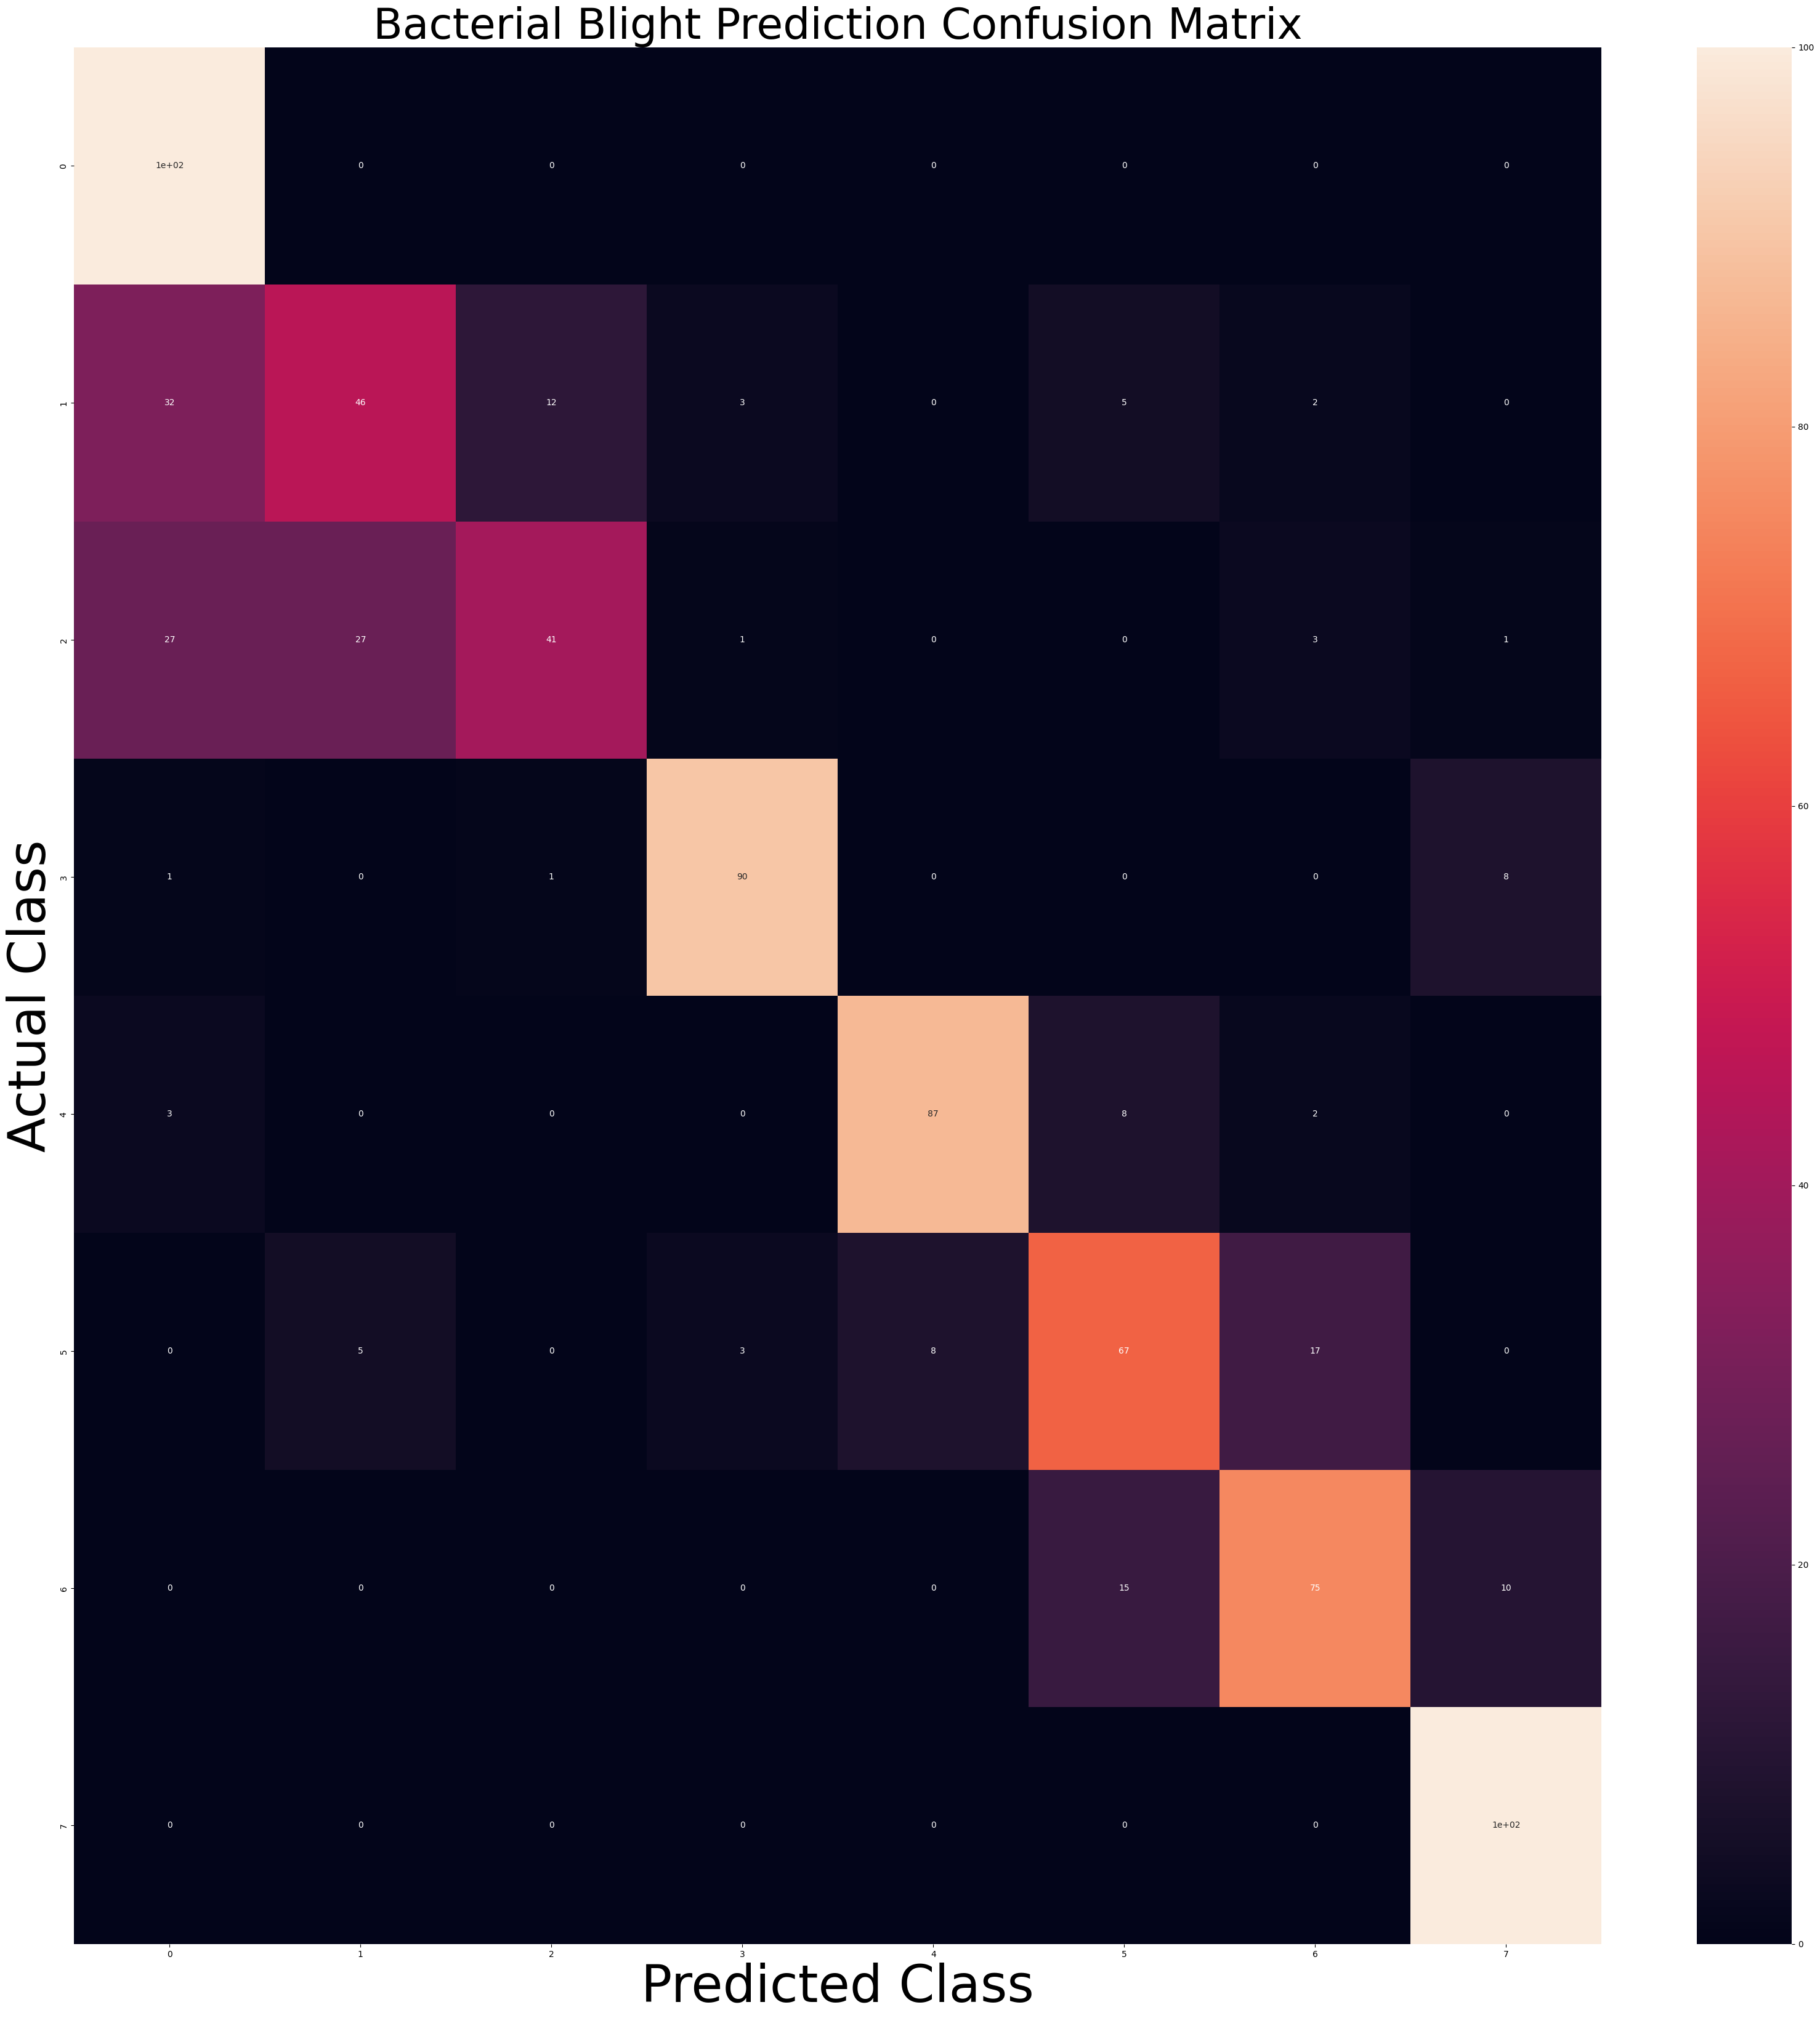

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel('Predicted Class', fontsize=60)
plt.ylabel('Actual Class', fontsize=60)
plt.title('Bacterial Blight Prediction Confusion Matrix', fontsize=50)
plt.show()